In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snn
%matplotlib inline
import missingno as msno

In [44]:
os.chdir('C:/Users/sid/Downloads/data/Section 1 - Code/Section 1')

In [45]:
df = pd.read_csv('winequality-white.csv', sep=';')

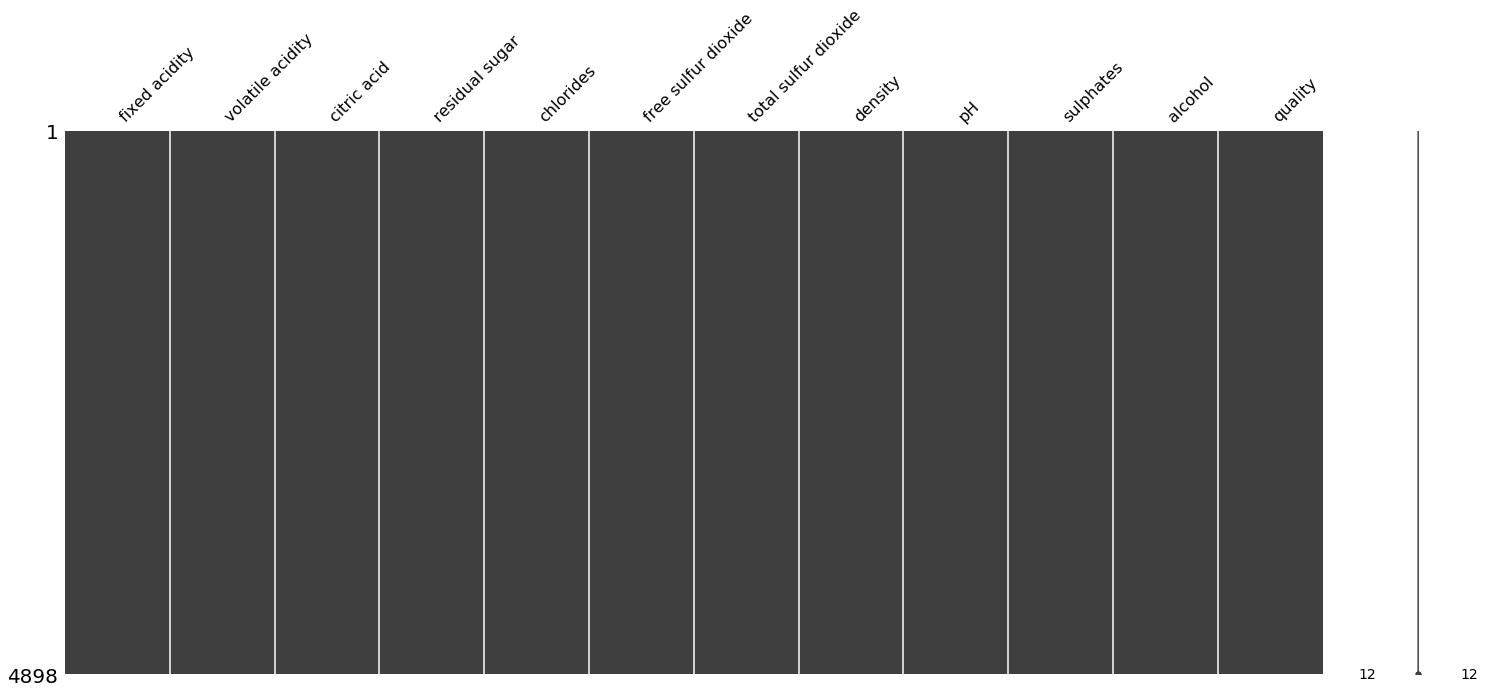

In [46]:
msno.matrix(df)

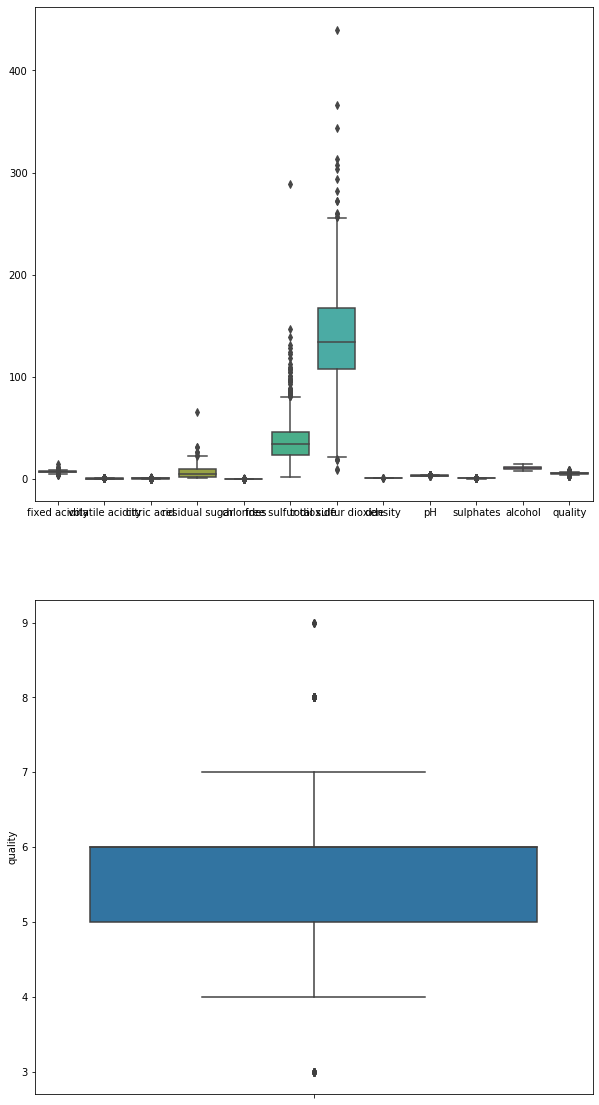

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(10 , 20)
snn.boxplot(data=df, orient='v', ax=axes[0])
snn.boxplot(data=df, y='quality', orient='pH', ax=axes[1])

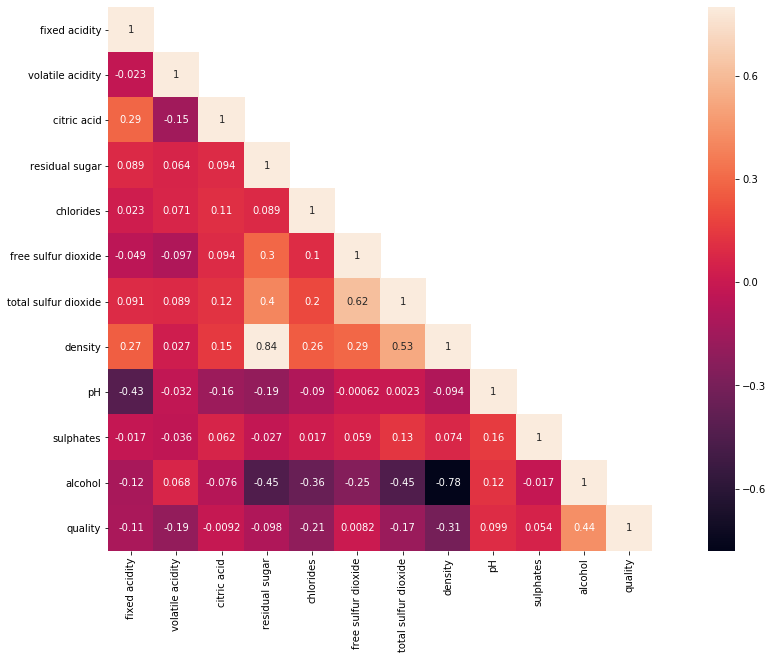

In [48]:
corrmat = df.corr()
mask = np.array(corrmat)
mask[np.tril_indices_from(mask)]= False
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
snn.heatmap(corrmat, mask=mask, vmax=.8, square=True, annot=True)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [50]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [51]:
x = np.append(arr = np.ones((x.shape[0], 1)), values=x, axis=1)

In [52]:
x_train, x_test, y_train, y_test  = train_test_split(x, y)

In [53]:
scaler  = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [54]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
predictions = regressor.predict(x_test)

In [55]:
predictions

array([5.71834509, 5.07984049, 5.48521478, ..., 5.56737527, 5.76417323,
       4.74965421])

In [56]:
y_test

2074    6
549     5
1133    5
2089    6
4481    5
552     7
726     7
503     5
4124    7
1146    5
3106    6
3708    5
1289    6
2166    5
3084    6
3187    7
3525    6
4682    6
4285    6
623     5
895     6
4212    4
4343    6
2888    4
3401    5
3729    5
2873    8
1944    5
811     6
2448    6
       ..
4144    6
2403    6
762     5
4595    6
1574    4
4414    7
1938    5
69      5
1948    7
3853    7
1701    5
4877    5
4884    5
3863    6
1641    6
2635    6
2413    4
3765    5
598     8
3915    7
3077    5
1036    5
4527    6
1005    6
4497    5
4427    5
2834    6
1730    6
3943    6
2304    6
Name: quality, Length: 1225, dtype: int64

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.2787370504185879

In [58]:
#done two times the b0 or constant itis
#x = np.append(arr = np.ones((x.shape[0], 1)), values=x, axis=1)

In [59]:
x

array([[ 1.  ,  7.  ,  0.27, ...,  3.  ,  0.45,  8.8 ],
       [ 1.  ,  6.3 ,  0.3 , ...,  3.3 ,  0.49,  9.5 ],
       [ 1.  ,  8.1 ,  0.28, ...,  3.26,  0.44, 10.1 ],
       ...,
       [ 1.  ,  6.5 ,  0.24, ...,  2.99,  0.46,  9.4 ],
       [ 1.  ,  5.5 ,  0.29, ...,  3.34,  0.38, 12.8 ],
       [ 1.  ,  6.  ,  0.21, ...,  3.26,  0.32, 11.8 ]])

In [62]:
import statsmodels.formula.api as sm
x_opt = x[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,10, 11]]
regressor_ols = sm.ols(endog=y, exog=x_opt).fit()
regressor_ols.summary()

TypeError: from_formula() missing 2 required positional arguments: 'formula' and 'data'

In [ ]:
x = df[list(df.columns)[:-1]]
y = df['quality']

x=np.append(arr=np.ones((x.shape[0], 1)), values=x, axis=1)
x_opt = x[:, [0, 1, 2, 4, 6, 7, 8, 9 ,10, 11]]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train

In [ ]:
select a significance level and compare with p value
with all independent values
variable with high p values remove those
and fit again

In [ ]:
#fit the model again

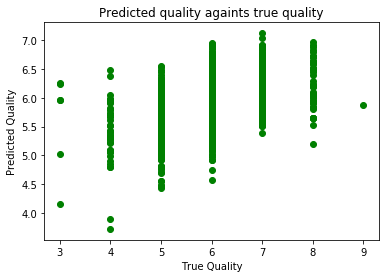

In [63]:
import matplotlib.pylab as plt
plt.scatter(y_test, predictions, c='g')
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted quality againts true quality')
plt.show()